# 2章 PyTorch入門

In [1]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [2]:
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

## 2.2 テンソル

### ライブラリインポート

In [3]:
# PyTorchライブラリ

import torch

### いろいろな階数のTensorを作る

In [7]:
# 0階テンソル (スカラー)
r0 = torch.tensor(1.0).float()

# typeを調べる
print(type(r0))

# dtypeを調べる
print(r0.dtype)

<class 'torch.Tensor'>
torch.float32


In [8]:
# shapeを調べる
print(r0.shape)

# データを調べる
print(r0.data)

torch.Size([])
tensor(1.)


In [9]:
# 1階テンソル (ベクトル)

# 1階のNumPy変数作成
r1_np = np.array([1, 2, 3, 4, 5])
print(r1_np.shape)

# NumPyからテンソルに変換
r1 = torch.tensor(r1_np).float()

# dtypeを調べる
print(r1.dtype)

# shapeを調べる
print(r1.shape)

# データを調べる
print(r1.data)

(5,)
torch.float32
torch.Size([5])
tensor([1., 2., 3., 4., 5.])


In [10]:
# 2階テンソル (行列)

# 2階のNmPy変数作成
r2_np = np.array([[1, 5, 6], [4, 3, 2]])
print(r2_np.shape)

# NumPyからテンソルに変換
r2 = torch.tensor(r2_np).float()

# shapeを調べる
print(r2.shape)

# データを調べる
print(r2.data)

(2, 3)
torch.Size([2, 3])
tensor([[1., 5., 6.],
        [4., 3., 2.]])


In [11]:
# ３階テンソル

# 乱数seedの初期化
torch.manual_seed(123)

# shape=[3,2,2]の正規分布変数テンソルを作る
r3 = torch.randn((3, 2, 2))

# shapeを調べる
print(r3.shape)

# データを調べる
print(r3.data)

torch.Size([3, 2, 2])
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])


In [12]:
# 4階テンソル

# shape=[2,3,2,2]の要素がすべて1のテンソルを作る
r4 = torch.ones((2, 3, 2, 2))

# shapeを調べる
print(r4.shape)

# データを調べる
print(r4.data)

torch.Size([2, 3, 2, 2])
tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])


### 整数型テンソルを作る

In [13]:
r5 = r1.long()

# dtype　を確認
print(r5.dtype)

# 値を確認
print(r5)

torch.int64
tensor([1, 2, 3, 4, 5])


### view関数

In [18]:
# 2階化
# 要素数に-1を指定すると、この数を自動調整する

print(r3.data)
print(r3.shape)
print('--------')

r6 = r3.view(3, -1)

# shape確認
print(r6.shape)

# 値確認
print(r6.data)

tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])
torch.Size([3, 2, 2])
--------
torch.Size([3, 4])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])


In [19]:
# 1階化
# 要素数に-1を指定すると、この数を自動調整する

r7 = r3.view(-1)

# shape確認
print(r7.shape)

# 値確認
print(r7.data)

torch.Size([12])
tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
         0.3239, -0.1085,  0.2103, -0.3908])


### それ以外の属性

In [22]:
print(r1.data)

# requires_grad属性
print('requires_grad: ', r1.requires_grad)

# device属性
print('device: ', r1.device)

tensor([1., 2., 3., 4., 5.])
requires_grad:  False
device:  cpu


### item関数

In [24]:
print(r0)

# スカラーテンソル(0階テンソル)に対してはitem関数で値を取り出せる
item = r0.item()

print(type(item))
print(item)

tensor(1.)
<class 'float'>
1.0


In [26]:
print(r1)

# 0階以外のテンソルにitem関数は無効
print(r1.item())

tensor([1., 2., 3., 4., 5.])


RuntimeError: a Tensor with 5 elements cannot be converted to Scalar

In [29]:
# 要素数が1つだけの1階テンソルはOK
# (2階以上でも同様)
t1 = torch.ones(1)

print(t1.data)

# shape確認
print(t1.shape)

# item関数呼び出し
print(t1.item())

tensor([1.])
torch.Size([1])
1.0


### max関数

In [30]:
# 元テンソルr2の確認
print(r2)

# max関数を引数なしで呼び出すと、全体の最大値が取得できる
print(r2.max())

tensor([[1., 5., 6.],
        [4., 3., 2.]])
tensor(6.)


In [31]:
# torch.max関数
# 2つめの引数はどの軸で集約するかを意味する
print(torch.max(r2, 1))

torch.return_types.max(
values=tensor([6., 4.]),
indices=tensor([2, 0]))


In [32]:
# 何番目の要素が最大値をとるかは、indicesを調べればいい
# 以下の計算は、多値分類で予測ラベルを求めるときによく利用されるパターン
print(torch.max(r2, 1)[1])

tensor([2, 0])


### NumPy変数への変換

In [33]:
# NumPy化
r2_np = r2.data.numpy()

# type 確認
print(type(r2_np))

# 値確認
print(r2_np)

<class 'numpy.ndarray'>
[[1. 5. 6.]
 [4. 3. 2.]]


## 2.4 ２次関数の勾配計算

 ### データ準備

In [34]:
# xをnumpy配列で定義
x_np = np.arange(-2, 2.1, 0.25)

# xの値表示
print(x_np)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [35]:
# (1) 勾配計算用変数の定義
x = torch.tensor(x_np, requires_grad=True, 
    dtype=torch.float32)

# 結果確認
print(x)

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)


### ２次関数の計算

In [36]:
# 2次関数の計算
# 裏で計算グラフが自動生成される

y = 2 * x**2 + 2

$ y = 2x^2 + 2$ を意味する

In [37]:
# yの計算結果確認

print(y)

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)


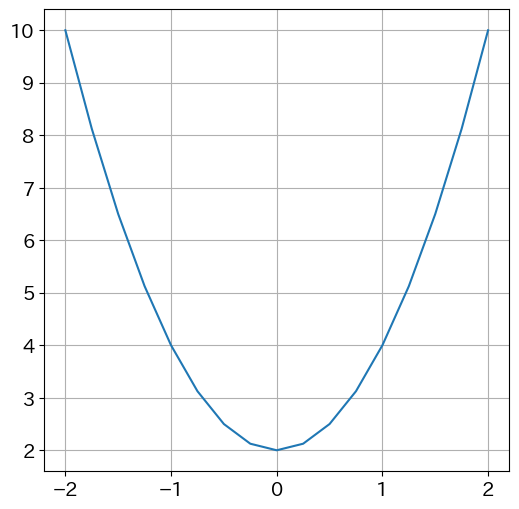

In [38]:
# グラフ描画

plt.plot(x.data, y.data)
plt.show()

In [39]:
# 勾配計算のため、sum 関数で 1階テンソルの関数値をスカラー化する
# (sum 関数を各要素で偏微分した結果は1なので、元の関数の微分結果を取得可能 ) 
# ( 詳細はサポートサイトの解説を参照のこと )

z = y.sum()

In [41]:
# (3) 計算グラフの可視化

# 必要ライブラリのインポート
from torchviz import make_dot

# # 可視化関数の呼び出し
# g= make_dot(z, params={'x': x})
# display(g)

In [42]:
# (4) 勾配計算

z.backward()

In [43]:
# (5) 勾配値の取得

print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])


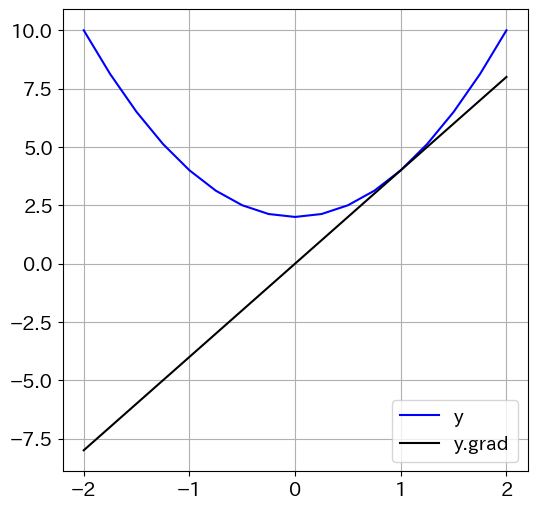

In [44]:
# 元の関数と勾配のグラフ化

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()

元の関数が2次関数なので、勾配計算の結果が直線になるのは、妥当な結果

ここでもう一度勾配計算をしてみる。

In [45]:
# 勾配の初期化せずに２度目の勾配計算

y = 2 * x**2 + 2
z = y.sum()
z.backward()

# xの勾配確認
print(x.grad)

tensor([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
          8.,  10.,  12.,  14.,  16.])


勾配値は、勾配計算の結果がどんどん加算されてしまう。そのため新しい値を計算したい場合、勾配値のリセットが必要。

In [47]:
# (6) 勾配の初期化は関数 zero_()を使う

x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


## 2.5 シグモイド関数の勾配計算

シグモイド関数は数式で表すと次の形になるが今回はPyTorchで提供されている関数を利用する  
$ y = \dfrac{1}{1 + \exp{(-x)}} $

In [51]:
# シグモイド関数の定義
sigmoid = torch.nn.Sigmoid()

sigmoid

Sigmoid()

In [52]:
# (2) yの値の計算

y = sigmoid(x)

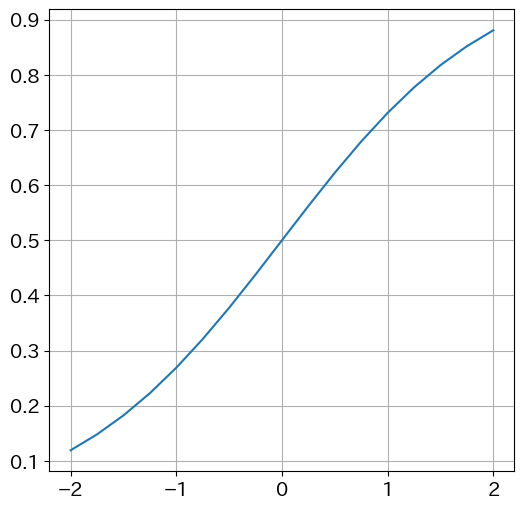

In [53]:
# グラフ描画

plt.plot(x.data, y.data)
plt.show()

In [54]:
# 勾配計算のためには、最終値はスカラーの必要があるため、ダミーでsum関数をかける

z = y.sum()

In [ ]:
# (3) 計算グラフの可視化

g = make_dot(z, params={'x': x})
display(g)

In [55]:
# (4) 勾配計算
z.backward()

# (5) 勾配値の確認
print(x.grad)

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])


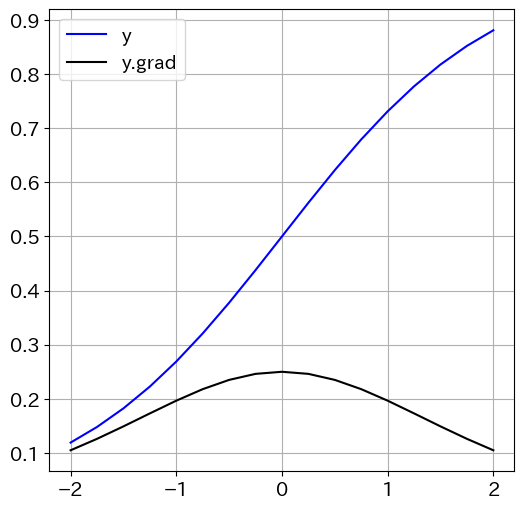

In [56]:
# 元の関数と勾配のグラフ化

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()

シグモイド関数の勾配は、$y(1-y)$になる。  
2次関数なので、$y=\dfrac{1}{2}$の時(x=0の時)最大値$\dfrac{1}{4}$を取る。  
上のグラフは、この計算結果と一致している。  

In [57]:
# (6) 勾配の初期化は関数 zero_()を使う

x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


### (参考)シグモイド関数を独自に実装した場合

In [58]:
# シグモイド関数の定義

def sigmoid(x):
    return(1/(1 + torch.exp(-x)))

In [59]:
# (2) yの値の計算

y = sigmoid(x)

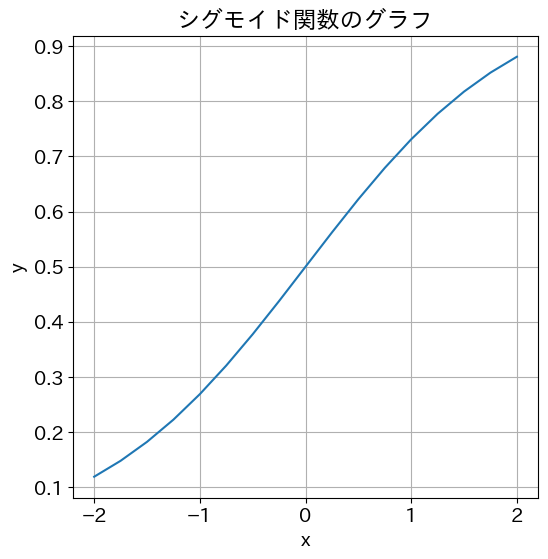

In [60]:
# グラフ描画

plt.plot(x.data, y.data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('シグモイド関数のグラフ')
plt.show()

In [61]:
# 勾配計算のためには、最終値はスカラーの必要があるため、ダミーでsum関数をかける

z = y.sum()

In [64]:
# # (3) 計算グラフの可視化

# params = {'x': x}
# g = make_dot(z, params=params)
# display(g)

In [65]:
# (4) 勾配計算
z.backward()

# (5) 勾配値の確認
print(x.grad)

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

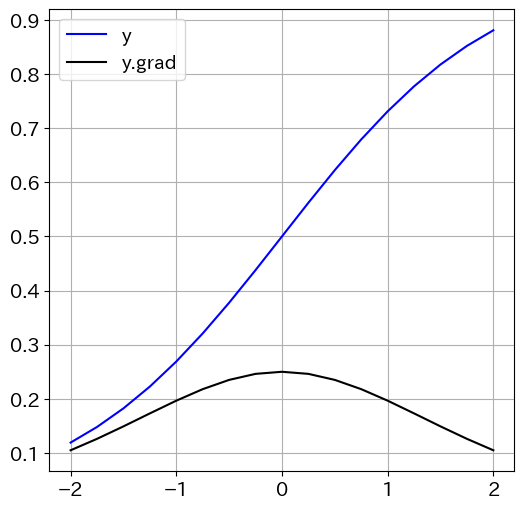

In [66]:
# 元の関数と勾配のグラフ化

plt.plot(x.data, y.data, c='b', label='y')
plt.plot(x.data, x.grad.data, c='k', label='y.grad')
plt.legend()
plt.show()